## 1.Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). 

In [41]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

In [4]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]    # средний балл ЕГЭ (целевая переменная)

In [13]:
X_st = X.copy().astype(np.float64)
X_st = (X - X.mean()) / X.std()

In [8]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err


In [9]:
# L2 регуляризация
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [14]:
eval_model_reg2(X_st, y, iterations=1000, alpha=1e-3, lambda_=100)

100 [-0.27904425 -0.27663254  0.93118484 -0.2780861 ] 3236.680086399935
200 [-0.27904425 -0.27663254  0.93118484 -0.2780861 ] 3236.6800863767726
300 [-0.27904425 -0.27663254  0.93118484 -0.2780861 ] 3236.6800863767726
400 [-0.27904425 -0.27663254  0.93118484 -0.2780861 ] 3236.6800863767726
500 [-0.27904425 -0.27663254  0.93118484 -0.2780861 ] 3236.6800863767726
600 [-0.27904425 -0.27663254  0.93118484 -0.2780861 ] 3236.6800863767726
700 [-0.27904425 -0.27663254  0.93118484 -0.2780861 ] 3236.6800863767726
800 [-0.27904425 -0.27663254  0.93118484 -0.2780861 ] 3236.6800863767726
900 [-0.27904425 -0.27663254  0.93118484 -0.2780861 ] 3236.6800863767726
1000 [-0.27904425 -0.27663254  0.93118484 -0.2780861 ] 3236.6800863767726


array([-0.27904425, -0.27663254,  0.93118484, -0.2780861 ])

In [21]:
w_list = [] #список векторов после каждой итерации
lambda_list = [] #список значений lambda

In [22]:
for lambda_val in range(10, 100, 10):
    w = eval_model_reg2(X_st, y, iterations=1000, alpha=1e-3, lambda_= lambda_val)
    w_list.append(w.copy())
    lambda_list.append(lambda_val)
    
w_list = np.array(w_list)

100 [-1.9684707  -2.03640285  6.60326444 -1.82573884] 2058.0542537921165
200 [-2.17266755 -2.16675614  6.91978973 -2.14762064] 1982.5194884242385
300 [-2.1919496  -2.17632353  6.93319797 -2.18253991] 1977.7378101452093
400 [-2.19399041 -2.17708022  6.93326792 -2.18665624] 1977.4170789619814
500 [-2.19422432 -2.17714403  6.93317713 -2.18716549] 1977.3937549081736
600 [-2.19425243 -2.17714958  6.9331595  -2.18723012] 1977.391851112061
700 [-2.19425589 -2.17715005  6.93315689 -2.18723843] 1977.3916735930095
800 [-2.19425633 -2.17715009  6.93315653 -2.18723951] 1977.3916549393173
900 [-2.19425638 -2.17715009  6.93315648 -2.18723965] 1977.391652804536
1000 [-2.19425639 -2.17715009  6.93315648 -2.18723966] 1977.391652547342
100 [-1.22231592 -1.22284873  4.02238691 -1.20090312] 2551.0360448345823
200 [-1.24157212 -1.23150461  4.04266888 -1.23715107] 2544.25440483671
300 [-1.24181773 -1.23157211  4.04273553 -1.23768363] 2544.1991545692777
400 [-1.24182119 -1.23157257  4.04273461 -1.23769193] 2

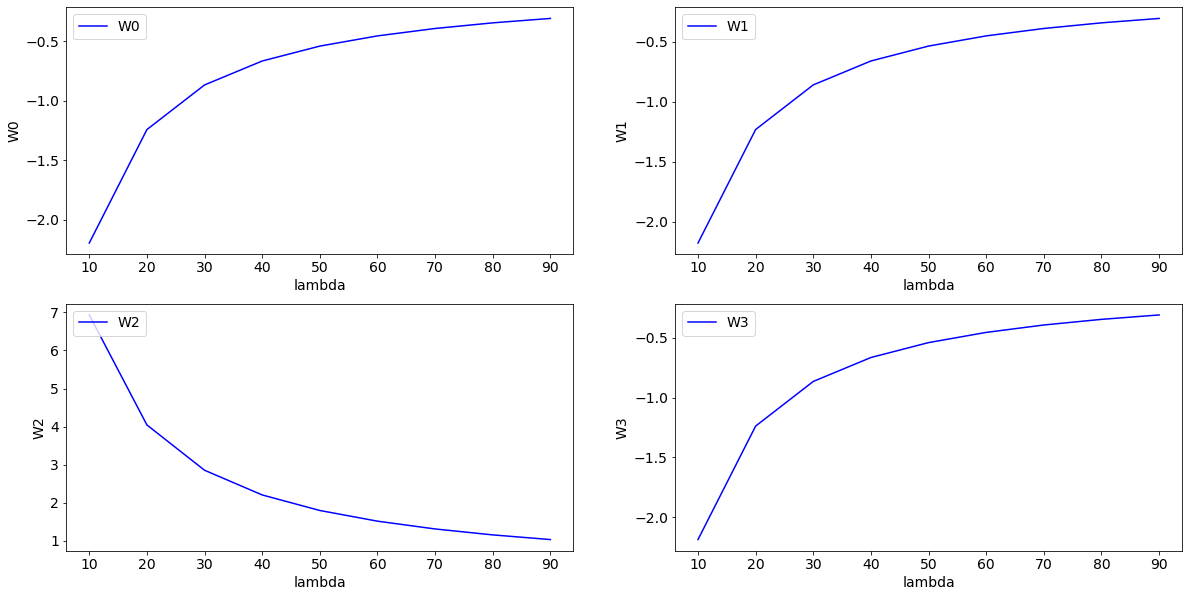

In [114]:
#зависимости весов всех признаков от lambda в L2-регуляризации
plt.figure(figsize=(20, 10))

for w_number in range(0,4):
    plt.subplot(2,2,w_number + 1)
    plt.plot(lambda_list, w_list[:,w_number],'blue', label = f'W{w_number}')
    plt.legend(loc="upper left")
    plt.xlabel(r'lambda')
    plt.ylabel(f'W{w_number}')

plt.show()

## 2.Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию? 

In [ ]:
Да, можно

## 3*Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [74]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [75]:
w = eval_model_reg1(X_st, y, iterations=1000, alpha=1e-3, lambda_= lambda_val)

100 [-0.06042577 -0.11447902  7.96125361 -0.09751689] 2130.9983437845503
200 [ 1.76729592e-02 -6.37682869e-03  1.17662351e+01 -6.69972340e-03] 1630.5193349379756
300 [-0.02201235 -0.021734   13.75047622 -0.03567856] 1406.2766222243263
400 [-2.13830379e-02  2.62746265e-04  1.47847855e+01 -2.53924308e-02] 1302.5971052416628
500 [-0.08606641 -0.0445953  15.32442433 -0.08096564] 1257.427246773554
600 [-0.09075834 -0.03026753 15.60550685 -0.07683307] 1231.5271052696203
700 [-6.41307965e-02  1.49596641e-02  1.57517093e+01 -4.15300113e-02] 1209.4188864113455
800 [-2.13627506e-02 -1.03890238e-01  1.58281859e+01  9.83645942e-03] 1207.6800250121883
900 [ 0.02973587 -0.03452267 15.8685211  -0.1105065 ] 1204.0227428414746
1000 [-0.09461035  0.0393394  15.8893235  -0.04631585] 1202.5905905904044


## 4*Сравните на графиках изменение весов признаков от lambda в L1-регуляризации и L2-регуляризации (на данных из урока).

In [95]:
w_list_l1 = []
for lambda_val in range(10, 100, 10):
    w = eval_model_reg1(X_st, y, iterations=1000, alpha=1e-3, lambda_= lambda_val)
    w_list_l1.append(w.copy())
    #lambda_list.append(lambda_val)
    
w_list_l1 = np.array(w_list_l1)

100 [-3.04450127 -3.48615268 13.3314603  -2.32440392] 1156.3766218556925
200 [-4.72263046 -5.15127853 19.16336364 -3.99615974] 597.7606767215018
300 [-5.60431576 -6.02937271 21.80866501 -4.87491077] 445.8443038880291
400 [-6.11077403 -6.53657796 22.97112333 -5.38002852] 396.45387502651147
500 [-6.43854612 -6.8670713  23.44498898 -5.70719385] 376.0344076195151
600 [-6.67941366 -7.11153415 23.60046617 -5.94778775] 365.1253614837579
700 [-6.87630945 -7.31238818 23.61005543 -6.14455663] 357.87300946575726
800 [-7.0493855  -7.48954879 23.55408369 -6.3175659 ] 352.24325579979507
900 [-7.20816717 -7.65243274 23.46990667 -6.47630087] 347.4343847047208
1000 [-7.35722017 -7.80555668 23.37484885 -6.6253089 ] 343.1002907764672
100 [-2.26771048 -2.58830461 12.71329717 -1.78721214] 1291.3764896660737
200 [-3.21533118 -3.52046183 18.48457245 -2.72749528] 737.2388882220897
300 [-3.45706313 -3.75563942 21.32285641 -2.96509388] 578.622686916371
400 [-3.37745954 -3.67373576 22.78789593 -2.88287028] 531.2

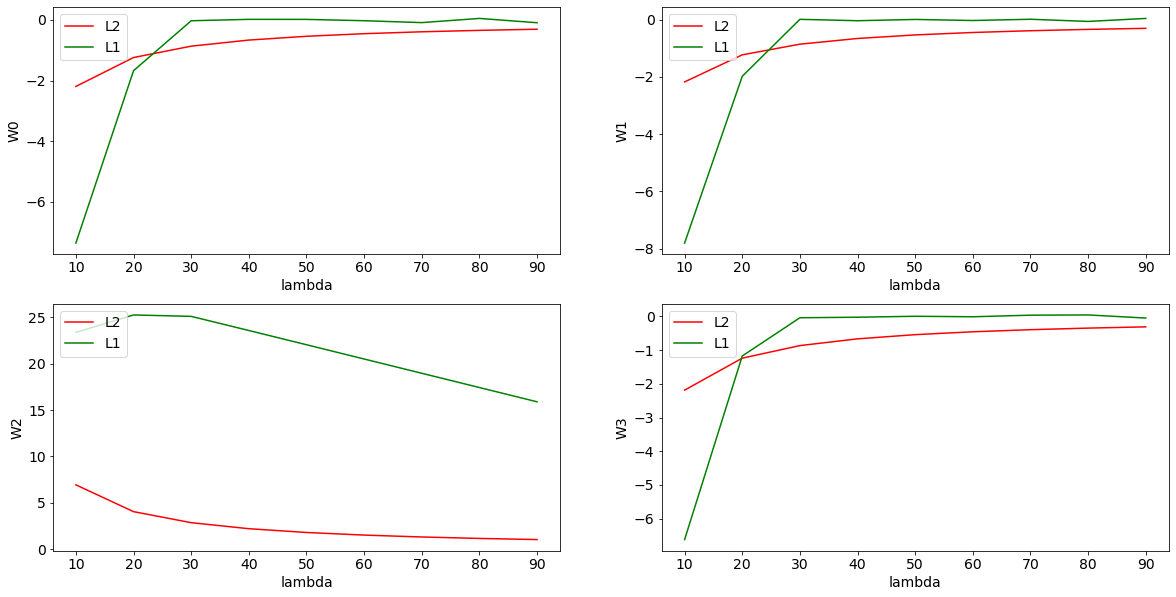

In [111]:
#зависимости весов всех признаков от lambda в L2-регуляризации и L1 регуляризации
plt.figure(figsize=(20, 10))

for w_number in range(0,4):
    plt.subplot(2,2,w_number + 1)
    plt.plot(lambda_list, w_list[:,w_number],'red', label = 'L2')
    plt.plot(lambda_list, w_list_l1[:,w_number],'green', label = 'L1')
    plt.legend(loc="upper left")
    plt.xlabel(r'lambda')
    plt.ylabel(f'W{w_number}')

plt.show()

## 5.*Постройте графики зависимости весов двух признаков (стаж и стоимость занятия) от количества итераций для градиентного спуска и для стохастического градиентного спуска (на данных из урока).

In [145]:
# Метод градиентного спуска
def eval_GD(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    w1_list = []
    w2_list = []
    iteration_list = []
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
            w1_list.append(W[1])
            w2_list.append(W[2])
            iteration_list.append(i)
            print(W[1])
            
    #w1_list = np.array(w1_list)
    #w2_list = np.array(w2_list)
    #iteration_list = np.array(iteration_list)
    return w1_list, w2_list, iteration_list

In [146]:
w1_list, w2_list, iteration_list = eval_GD(X_st, y, iterations=3000, alpha=1e-2)

300 [-20.97551933 -21.67828912  15.64819066 -19.94672528] 83.82975771880508
-21.67828912184829
600 [-25.52336892 -26.23644037  12.29407657 -24.49427324] 56.344519680618156
-26.23644037424719
900 [-26.90996219 -27.59249685  11.28164962 -25.87268303] 53.84038949835822
-27.592496848745288
1200 [-27.34243046 -27.98210324  10.97598652 -26.29458897] 53.61189428573549
-27.982103240183218
1500 [-27.48692617 -28.08001785  10.88363763 -26.42780441] 53.59069632078388
-28.080017846347975
1800 [-27.54450627 -28.08989501  10.85567085 -26.4738876 ] 53.58838195743907
-28.08989501425255
2100 [-27.5758534  -28.07320134  10.84713577 -26.49367247] 53.58778779842412
-28.073201335991318
2400 [-27.59928269 -28.04848855  10.84446553 -26.50551983] 53.58735035716385
-28.0484885488466
2700 [-27.62032198 -28.02135591  10.84356541 -26.51497129] 53.58692720904121
-28.02135590509541
3000 [-27.64063967 -27.99349336  10.84319955 -26.52369941] 53.586505379993675
-27.99349336107162


Text(0, 0.5, 'W')

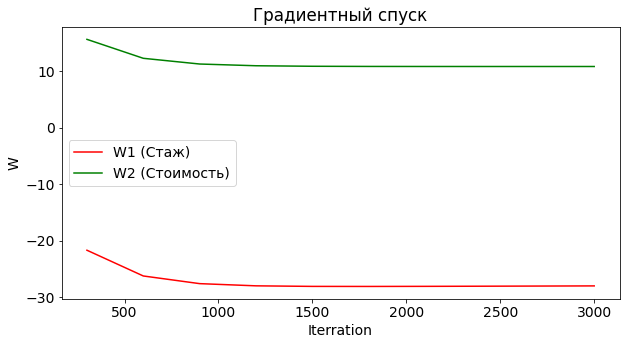

In [157]:
plt.figure(figsize=(10,5))
plt.title('Градиентный спуск')
plt.plot(iteration_list, w1_list,'red', label = 'W1 (Стаж)')
plt.plot(iteration_list, w2_list,'green', label = 'W2 (Стоимость)')
plt.legend(loc="center left")
plt.xlabel(r'Iterration')
plt.ylabel(f'W')

In [161]:
# Метод стохастического градиентного спуска (mini-batch SGD)
def eval_SGD(X, y, iterations, qty_in_batch, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0]) # начальное приближение весов
    n = X.shape[1] # число наблюдений
    w1_list_st = []
    w2_list_st = []
    iteration_list = []
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    # print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T))
        if i % (iterations / 10) == 0:
            w1_list_st.append(W[1])
            w2_list_st.append(W[2])
            iteration_list.append(i)
            print(i, W, err)
    return w1_list, w2_list, iteration_list

In [164]:
w1_list_st, w2_list_st, iteration_list = eval_SGD(X_st, y, iterations=3000, qty_in_batch=7, alpha=1e-3)

300 [-7.72212979 -8.31376141 22.30406272 -6.67528982] 395.4291554486302
600 [-10.46280818 -11.07027753  23.099804    -9.41758025] 345.1677021307822
900 [-12.43144991 -13.05801067  21.93095704 -11.38955269] 284.58404048437814
1200 [-14.13125259 -14.77477764  20.70301758 -13.09238673] 231.53858522488395
1500 [-15.63488101 -16.29297265  19.59406272 -14.59859521] 188.72060460371551
1800 [-16.96875956 -17.63923838  18.60812885 -15.9346345 ] 154.42517046493774
2100 [-18.1524611  -18.83338808  17.73312524 -17.12012279] 126.93653720713144
2400 [-19.20295804 -19.89261218  16.95672875 -18.17207446] 104.864527650605
2700 [-20.13526956 -20.83212379  16.26784294 -19.10554608] 87.10568254566697
3000 [-20.96271781 -21.6654172   15.6566056  -19.93389302] 72.78556186586547


Text(0, 0.5, 'W')

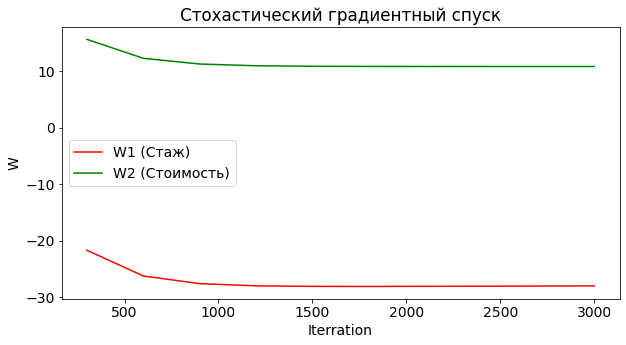

In [165]:
plt.figure(figsize=(10,5))
plt.title('Стохастический градиентный спуск')
plt.plot(iteration_list, w1_list_st,'red', label = 'W1 (Стаж)')
plt.plot(iteration_list, w2_list_st,'green', label = 'W2 (Стоимость)')
plt.legend(loc="center left")
plt.xlabel(r'Iterration')
plt.ylabel(f'W')